In [1]:
import scipy.sparse as sparse
import scipy.sparse.linalg as linalg
import numpy as np
from random import randint
import sys
from matplotlib import pyplot as plt

In [2]:
size = 10000

In [3]:
mat = sparse.dok_matrix((size, size), dtype=np.float32)
for i in range(size):
    mat[i, i] = 1

In [4]:
vec = sparse.dok_matrix((size, 1), dtype=np.float32)
for i in range(size):
    vec[i, 0] = i

In [5]:
mat = mat.tocsc()

In [6]:
sparse.linalg.spsolve(mat, vec)

array([  0.00000000e+00,   1.00000000e+00,   2.00000000e+00, ...,
         9.99700000e+03,   9.99800000e+03,   9.99900000e+03], dtype=float32)

In [7]:
# ok! now try simulating the cube.
# AS READABLE AS POSSIBLE.
solved_configuration = (
    (0, 0, 0, 0), (1, 1, 1, 1), (2, 2, 2, 2),
    (3, 3, 3, 3), (4, 4, 4, 4), (5, 5, 5, 5)
)

def D(config):
    # unpack.
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    # repack.
    return ((c01, c02, c03, c04), (c11, c44, c43, c14), (c21, c22, c12, c13),
            (c31, c24, c23, c34), (c41, c42, c32, c33), (c52, c53, c54, c51))

def Di(config):
    # unpack.
    (c01, c02, c03, c04), (c11, c44, c43, c14), (c21, c22, c12, c13), \
    (c31, c24, c23, c34), (c41, c42, c32, c33), (c52, c53, c54, c51) = config
    
    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

def L(config):
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    return ((c01, c34, c33, c04), (c11, c12, c02, c03), (c21, c22, c23, c24), \
            (c31, c32, c52, c53), (c42, c43, c44, c41), (c51, c14, c13, c54))

def Li(config):
    (c01, c34, c33, c04), (c11, c12, c02, c03), (c21, c22, c23, c24), \
    (c31, c32, c52, c53), (c42, c43, c44, c41), (c51, c14, c13, c54) = config
    
    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

def B(config):
    (c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
    (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54) = config
    
    return ((c01, c02, c22, c23), (c11, c12, c13, c14), (c21, c54, c53, c24), \
            (c32, c33, c34, c31), (c41, c04, c03, c44), (c51, c52, c42, c43))

def Bi(config):
    (c01, c02, c22, c23), (c11, c12, c13, c14), (c21, c54, c53, c24), \
    (c32, c33, c34, c31), (c41, c04, c03, c44), (c51, c52, c42, c43) = config

    return ((c01, c02, c03, c04), (c11, c12, c13, c14), (c21, c22, c23, c24), \
            (c31, c32, c33, c34), (c41, c42, c43, c44), (c51, c52, c53, c54))

In [8]:
# let's do some math.
start_point = solved_configuration
new_states = set([start_point]) # everything that needs another look at
states = set([start_point]) # everything
links = set([]) # tuples of indexes into states
rotations = [D, Di, L, Li, B, Bi]
states_index = {start_point : 0}

while new_states:
    # get a new base state. this is what we're going to be clearing off our list.
    base_state = new_states.pop()
    
    # now, rotate it in each direction:
    for rotate in rotations:
        new_state = rotate(base_state)
        
        # add the new state
        if new_state not in states:
            new_states.add(new_state)
            states.add(new_state)
            
            states_index[new_state] = len(states) - 1
            
            if len(states) % 100000 == 0:
                sys.stdout.write('.')
                if len(states) % 1000000 == 0:
                    sys.stdout.write('\n')
                sys.stdout.flush()
                
        
        # add the link, if it's new, to the list.
        link = (states_index[base_state], states_index[new_state])
        if link not in links:
            links.add(link)
        
        


..........
..........
..........
......

In [9]:
print len(states)
print len(links)

3674160
22044960


In [20]:
smaller_size = 

mat = sparse.dok_matrix((3674159, 3674159), dtype=np.float64)
for i in range(3674159):
    mat[i, i] = 1
for e, (s, d) in enumerate(links):
    if e % 100000 == 0:
        sys.stdout.write('.')
        if e % 3600000 == 0:
            sys.stdout.write('\n')
        sys.stdout.flush()
    if s != 0 and d != 0:
        mat[s-1, d-1] = -1/6.

.
....................................
....................................
....................................
....................................
....................................
....................................
....

In [21]:
matcsr = mat.tocsr()

In [22]:
sparse.save_npz('matcsr.npz', matcsr)

In [2]:
matcsr = sparse.load_npz('matcsr.npz')

In [40]:
small_size = 3674159
small = matcsr[:small_size, :small_size]

In [3]:
ones = np.ones((3674159, 1))
ones

array([[ 1.],
       [ 1.],
       [ 1.],
       ..., 
       [ 1.],
       [ 1.],
       [ 1.]])

In [6]:
product = matcsr * ones

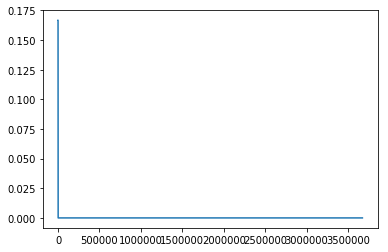

In [7]:
plt.plot(product)
plt.show()

In [4]:
result, conv = sparse.linalg.bicg(matcsr, ones)

In [11]:
solve_times = result

In [17]:
from_solved = product

In [10]:
assert(conv == 0)
print result.sum()/3674160

4647940.18203


In [18]:
from_solved.T.dot(solve_times) # NOTE this is states-1 - as would make sense!!!

array([ 3674159.00005147])

In [46]:
average_time = [0, from_solved.T.dot(solve_times)[0]]

def get_chance_weights(matcsr, from_solved, old_weights, old_solved):
    new_weights = -(matcsr*old_weights - old_weights) + old_solved * from_solved
    new_solved = old_weights * from_solved
    return new_weights, new_solved

weights = from_solved
solved = 0
for i in range(100):
    if i % 10 == 0:
        sys.stdout.write('.')
        sys.stdout.flush()
    weights, solved = get_chance_weights(matcsr, from_solved, weights, solved)
    # normalize weights
    weights = weights / (weights.sum() + solved)
    average_time.append(weights.T.dot(solve_times)[0])
    

..........

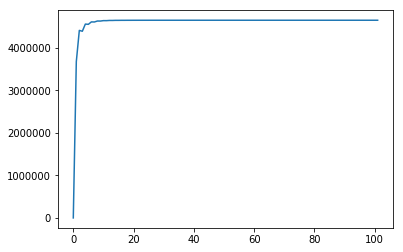

In [47]:
plt.plot(average_time)
plt.show()

In [48]:
average_time

[0,
 3674159.0000514705,
 4408989.5978337638,
 4389128.3383732084,
 4557466.1791546419,
 4552060.6793231517,
 4608894.095041737,
 4606975.9285041597,
 4629661.967994187,
 4628881.2198805846,
 4638861.4595863624,
 4638514.6324559245,
 4643209.3653481109,
 4643045.0576804532,
 4645371.1483706431,
 4645289.0673806109,
 4646492.9324581511,
 4646449.9122585682,
 4647097.4752467424,
 4647073.8447569506,
 4647434.6677386351,
 4647421.0389589407,
 4647628.7976561273,
 4647620.510120769,
 4647743.886027772,
 4647738.5437836945,
 4647813.9804637004,
 4647810.3117300887,
 4647857.7346896818,
 4647855.0439737393,
 4647885.6593301501,
 4647883.555435664,
 4647903.8364736959,
 4647902.09340542,
 4647915.875584906,
 4647914.3594317846,
 4647923.9703594893,
 4647922.5998524539,
 4647929.4840477183,
 4647928.208749976,
 4647933.2814175105,
 4647932.0693736505,
 4647935.9213978406,
 4647934.7519756295,
 4647937.7713787165,
 4647936.6310298527,
 4647939.0764867682,
 4647937.9561786437,
 4647940.002434562